In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv("A_Z Handwritten Data.csv")


In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def check_unique_classes():
    unique_classes, class_counts = np.unique(data.iloc[:, 0].values, return_counts=True)
    print("Unique classes:", unique_classes)
    print("Class counts:", class_counts)
    return unique_classes, class_counts

In [5]:
unique_classes, class_counts = check_unique_classes()

Unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Class counts: [13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]


In [6]:
print(np.size(unique_classes))

26


In [7]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
print(np.size(y))

372450


In [8]:
def visualize_sample(index):
    image = X[index].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {y[index]}")
    plt.show()

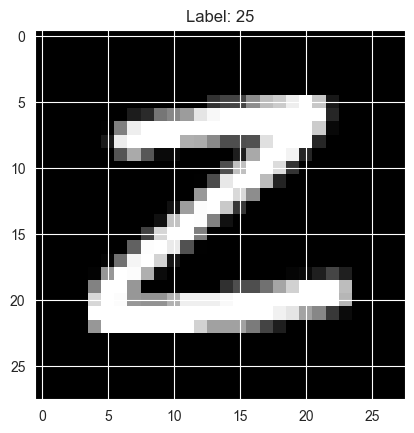

In [10]:
visualize_sample(370000)

In [11]:
def samples(data, label_column, n=1000):
    sampled_data = []

    for label in data[label_column].unique():
        class_data = data[data[label_column] == label]
        if len(class_data) > n:
            class_data = class_data.sample(n=n, random_state=42)
        sampled_data.append(class_data)

    return pd.concat(sampled_data).reset_index(drop=True)

In [12]:
df = samples(data, "0", 1000)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_18508\4246819692.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  limited_data = data.groupby(label_column).apply(


In [13]:
df['0'].sum()

np.int64(325000)

In [14]:
x = df.drop(['0'], axis=1)
y = df['0']

In [105]:
y

0         0
1         0
2         0
3         0
4         0
         ..
25995    25
25996    25
25997    25
25998    25
25999    25
Name: 0, Length: 26000, dtype: int64

In [106]:
x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True,random_state=42)

In [16]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20800, 784)
X_test shape: (5200, 784)
y_train shape: (20800,)
y_test shape: (5200,)


In [17]:
# x_train_2,x_valid,y_train_2,y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True,random_state=42)

In [18]:
# print(f"X_train_2 shape: {x_train_2.shape}")
# print(f"X_validation shape: {x_valid.shape}")
# print(f"y_train_2 shape: {y_train_2.shape}")
# print(f"y_validation shape: {y_valid.shape}")

X_train_2 shape: (16640, 784)
X_validation shape: (4160, 784)
y_train_2 shape: (16640,)
y_validation shape: (4160,)


In [110]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [111]:
x_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392]])

In [112]:
x_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392]])

In [39]:
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)    
y_pred_linear = svm_linear.predict(x_test)

In [40]:
print("SVM Linear Kernel:\n", classification_report(y_test, y_pred_linear))

SVM Linear Kernel:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       191
           1       0.80      0.88      0.84       182
           2       0.86      0.88      0.87       218
           3       0.84      0.84      0.84       219
           4       0.78      0.78      0.78       195
           5       0.88      0.96      0.92       191
           6       0.85      0.84      0.84       230
           7       0.79      0.80      0.79       192
           8       0.89      0.97      0.93       212
           9       0.83      0.83      0.83       214
          10       0.82      0.89      0.85       209
          11       0.91      0.96      0.94       213
          12       0.89      0.89      0.89       221
          13       0.79      0.80      0.80       187
          14       0.87      0.88      0.87       195
          15       0.91      0.93      0.92       194
          16       0.87      0.81      0.84       197
       

In [41]:
f1_linear_svm = f1_score(y_test, y_pred_linear, average='weighted')
print(f1_linear_svm)

0.8688539512209161


In [42]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

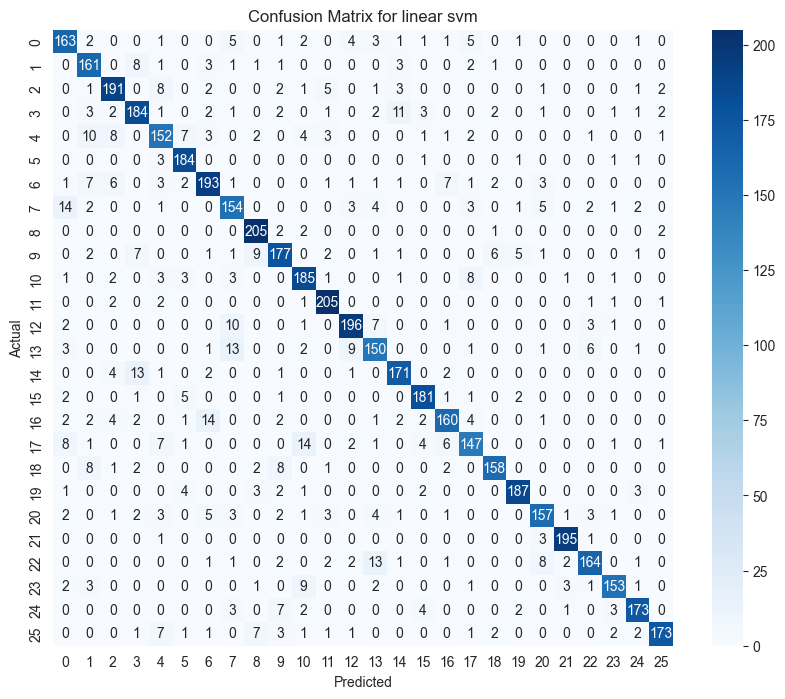

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for linear svm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SVM nonlinear kernel


In [44]:
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [45]:
print("SVM Nonlinear Kernel:\n", classification_report(y_test, y_pred_rbf))

SVM Nonlinear Kernel:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       191
           1       0.89      0.96      0.92       182
           2       0.94      0.93      0.93       218
           3       0.94      0.93      0.93       219
           4       0.92      0.86      0.89       195
           5       0.97      0.98      0.98       191
           6       0.96      0.90      0.93       230
           7       0.89      0.89      0.89       192
           8       0.97      0.96      0.96       212
           9       0.89      0.89      0.89       214
          10       0.89      0.94      0.92       209
          11       0.93      0.98      0.95       213
          12       0.94      0.92      0.93       221
          13       0.87      0.93      0.90       187
          14       0.94      0.96      0.95       195
          15       0.93      0.97      0.95       194
          16       0.92      0.91      0.92       197
    

In [46]:
f1_rbf_svm = f1_score(y_test, y_pred_rbf, average='weighted')
print(f1_rbf_svm)

0.9318631184839772


In [47]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

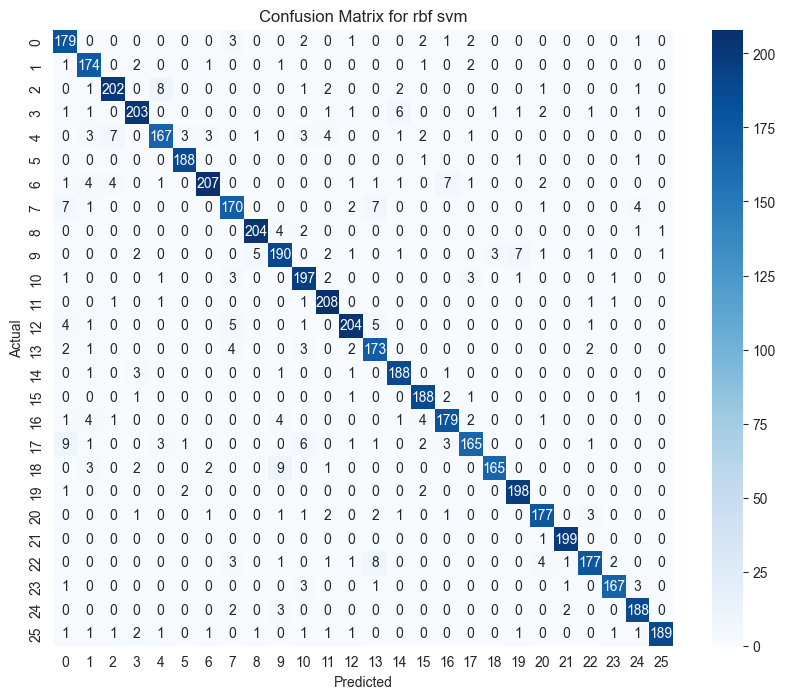

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for rbf svm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
from keras.src.callbacks import early_stopping

model1 = models.Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(26, activation='softmax')
])

In [55]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history1 =model1.fit(
    x_train, y_train,
    epochs=20,batch_size=32,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3042 - loss: 2.7465 - val_accuracy: 0.7195 - val_loss: 1.3622
Epoch 2/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7519 - loss: 1.1867 - val_accuracy: 0.7923 - val_loss: 0.8424
Epoch 3/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8181 - loss: 0.7599 - val_accuracy: 0.8250 - val_loss: 0.6657
Epoch 4/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.5899 - val_accuracy: 0.8541 - val_loss: 0.5647
Epoch 5/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.4895 - val_accuracy: 0.8692 - val_loss: 0.4984
Epoch 6/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8945 - loss: 0.4128 - val_accuracy: 0.8772 - val_loss: 0.4526
Epoch 7/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9056 - loss: 0.3648 - val_accuracy: 0.8856 - val_loss: 0.4195
Epoch 8/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.3259 - val_accuracy: 0.

In [57]:
test_loss_1, test_acc_1 = model1.evaluate(x_test,  y_test, verbose=2)
print(f"Validation Loss: {test_loss_1}")
print(f"Validation Accuracy: {test_acc_1}")

163/163 - 1s - 4ms/step - accuracy: 0.9235 - loss: 0.2635
Validation Loss: 0.26348361372947693
Validation Accuracy: 0.9234615564346313


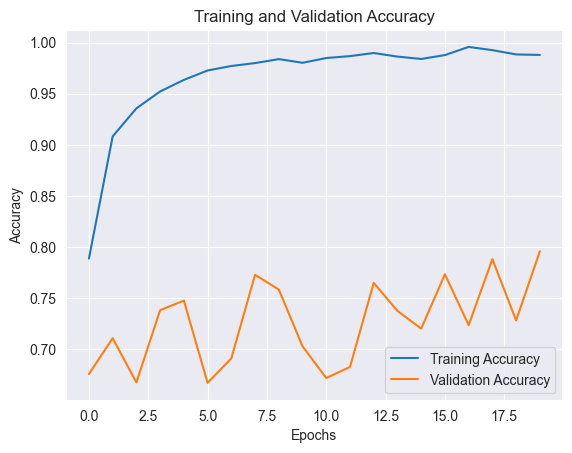

In [125]:
# plt.plot(history1.history['accuracy'], label='Training Accuracy')
# plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training and Validation Accuracy')
# plt.show()

In [34]:
model2 = models.Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(26, activation='softmax')
])

In [35]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history2 =model2.fit(
    x_train, y_train,
    epochs=20,batch_size=32,
    validation_split=0.2,
    verbose=1,)


Epoch 1/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4820 - loss: 1.8443 - val_accuracy: 0.8151 - val_loss: 0.6547
Epoch 2/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.5389 - val_accuracy: 0.8618 - val_loss: 0.4834
Epoch 3/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8967 - loss: 0.3785 - val_accuracy: 0.8928 - val_loss: 0.4073
Epoch 4/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9202 - loss: 0.2876 - val_accuracy: 0.8928 - val_loss: 0.3865
Epoch 5/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.2291 - val_accuracy: 0.8983 - val_loss: 0.3609
Epoch 6/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9440 - loss: 0.1955 - val_accuracy: 0.9106 - val_loss: 0.3320
Epoch 7/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9589 - loss: 0.1417 - val_accuracy: 0.9034 - val_loss: 0.3518
Epoch 8/20
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1256 - val_accuracy: 0.

In [37]:
test_loss_2, test_acc_2 = model2.evaluate(x_test,  y_test, verbose=2)
print(f"Validation Loss: {test_loss_2}")
print(f"Validation Accuracy: {test_acc_2}")


163/163 - 1s - 3ms/step - accuracy: 0.9269 - loss: 0.3616
Validation Loss: 0.36164164543151855
Validation Accuracy: 0.9269230961799622


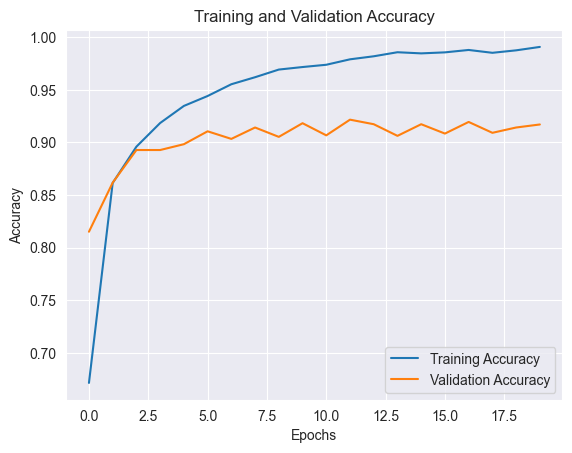

In [38]:
# plt.plot(history2.history['accuracy'], label='Training Accuracy')
# plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training and Validation Accuracy')
# plt.show()

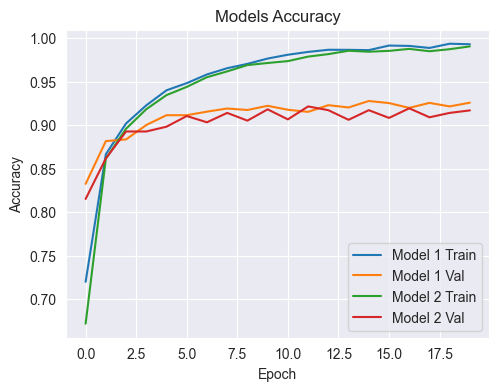

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Model 1 Train')
plt.plot(history1.history['val_accuracy'], label='Model 1 Val')
plt.plot(history2.history['accuracy'], label='Model 2 Train')
plt.plot(history2.history['val_accuracy'], label='Model 2 Val')
plt.title('Models Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [68]:
if(test_acc_1 > test_acc_2):
    model1.save('model.h5')
else:
    model2.save('model.h5')

In [69]:
loaded_model = load_model('model.h5')

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


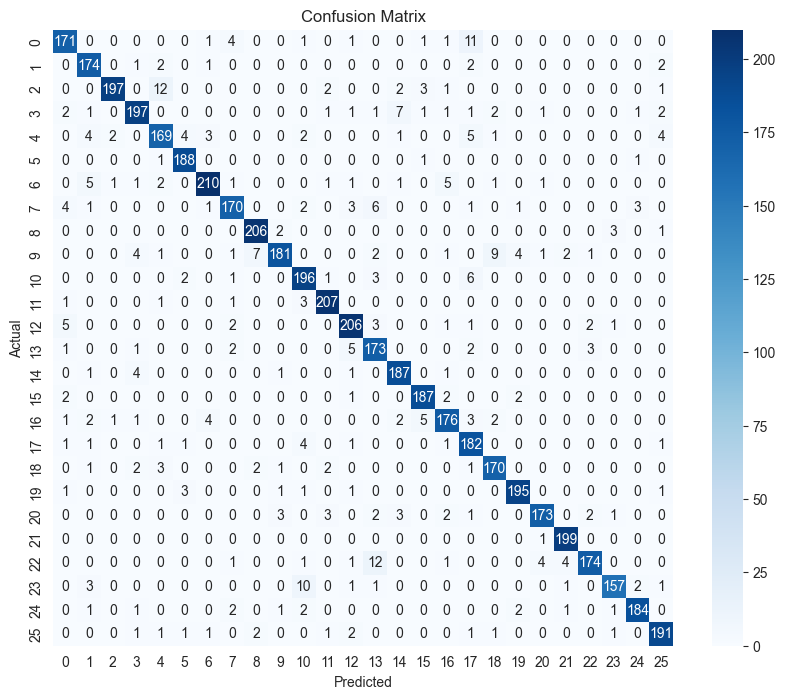


Test Set F1 Score: 0.9269


In [70]:
pred = loaded_model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

conf_matrix = confusion_matrix(y_test, pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    
f1 = f1_score(y_test, pred_classes, average='weighted')
print(f"\nTest Set F1 Score: {f1:.4f}")